<a href="https://colab.research.google.com/github/dbahiense/ml/blob/main/number_recognition_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://projects.raspberrypi.org/en/projects/teach-a-computer-to-read/0

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
def plot_accuracy_and_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy Loss')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
IMAGE_SIZE = 28
training_labels = None

def get_image_from_url(image_url):
  # If the temporary test_image.jpg file already exists, 
  # delete it so a new one can be made.
  if os.path.exists('/root/.keras/datasets/test_image.jpg'):
    os.remove('/root/.keras/datasets/test_image.jpg')

  image_path = tf.keras.utils.get_file('test_image.jpg', origin=image_url)
  return image_path

def predict_image(image_url, labels = training_labels):
  image_path = get_image_from_url(image_url)
  
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)).convert('L')

  plt.figure()
  plt.imshow(image, cmap='gray')

  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis=0)
  prediction_result = model.predict(image, batch_size=1)
  print('Your model predicts this number is {}'.format(prediction_result.argmax()))

Load the MNIST data you'll use to train your model.

In [ ]:
numbers = tf.keras.datasets.mnist

(training_images, training_labels), (validation_images, validation_labels) = numbers.load_data()

Explore your data and print out a number.

3
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

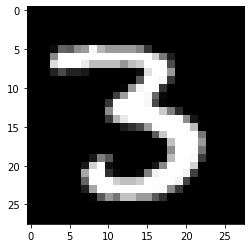

In [49]:
plt.imshow(training_images[12], cmap='gray')
print(training_labels[12])

print(training_images[12])

Divide your images so all their colour values are between 0 and 1.

In [ ]:
training_images = training_images / 255.0
validation_images = validation_images / 255.0

Build your model out of layers.

In [ ]:
model = tf.keras.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(500, activation='relu'),
                                    tf.keras.layers.Dense(300, activation='relu'),
                                    tf.keras.layers.Dense(10, activation= 'softmax')
                                    ])

Compile your model and look at its structure.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 300)               150300    
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


Train your model.

Epoch 1/10
600/600 [==============================] - 9s 14ms/step - loss: 0.2100 - accuracy: 0.9379 - val_loss: 0.1003 - val_accuracy: 0.9688
Epoch 2/10
600/600 [==============================] - 6s 11ms/step - loss: 0.0802 - accuracy: 0.9751 - val_loss: 0.0797 - val_accuracy: 0.9750
Epoch 3/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0516 - accuracy: 0.9836 - val_loss: 0.0738 - val_accuracy: 0.9765
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 0.0664 - val_accuracy: 0.9788
Epoch 5/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0716 - val_accuracy: 0.9790
Epoch 6/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0700 - val_accuracy: 0.9805
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0727 - val_accuracy: 0.9809

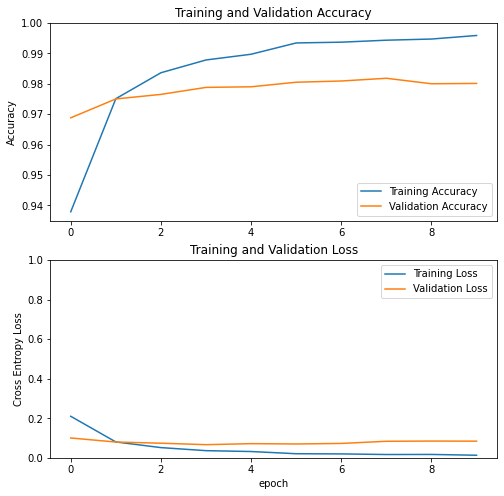

In [ ]:
history = model.fit(training_images,
                    training_labels,
                    batch_size=100,
                    epochs=10,
                    validation_data = (validation_images, validation_labels)
                    )

plot_accuracy_and_loss(history)

Test your model.

16384/1418 [==========================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step
Your model predicts this number is 0

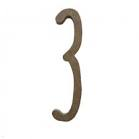

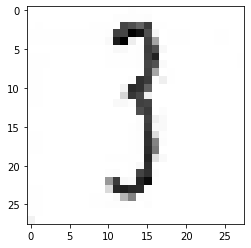

In [ ]:
predict_image('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAIsAiwMBIgACEQEDEQH/xAAcAAEBAQACAwEAAAAAAAAAAAAAAQcFBgMECAL/xAA1EAABBAECAwUFBwUBAAAAAAAAAQIDBAUGERIhMQdBUWGRE3GBocEiJDJDYnKCFBYzQqIV/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAMCAQT/xAAeEQEAAgMBAAMBAAAAAAAAAAAAARECAzEhIkFCEv/aAAwDAQACEQMRAD8A3EBQAAAAAgFJuDoWsdaPrzvx+He1JGLwy2NkXhXwb5+ZyZp2It30bmEyZO5PMnt79hZN991mdv8ADmdm0dq+3XvQ0sjO6erK5GI+Rd3Rr0Tn4bmI2RbX8U1EEKUYAAAAAAAAQFAEBQBAUAeG218lWZkTuGR0bka7wXbkp8+yTpHYWBGvktcfs0hRPtOfvtt6n0OeBKNRLP8AUpVgSwv5qRpxevUzljbWOVOgYzssx02LbJl5LH/qyN43Sxy7JC5eiInRdvM6RchmoXZqdr/NC9Y3KneqL1TyXr8TfVMa7QI0j1bdVNvtIx3/AChjOIiGsJuWq6euLfwlK0v4pIWq737c/mcgdc7PZPaaTp/pV7fR6nZCkcYnqFAOuBCgAAAIAUAAAAAAgKAIpjvaBIkmq7qJ/qjG7/wQ123YiqVpbFhyMiiar3uXuRDCMvfdkMnbuqi8U0jn7eCdET05EtvKb19ax2dx+z0nT/U6R3q9TspxmmqbsfgaNWRNpI4W8f7l5r81OSKY8ZnqgA64AAAQoAhSFAAAAAAB+JpWQRPllejI2NVznOXZEROqn7PUytNuRxtqk9ytbYhdEqp3bptuBlWttYS5ly1KCqzHtdzVesyp3r4J4IeXs+00/J3mZG237lWeisRfzXpzRPcnX5eJxed0plMDGk1xsT66v4Eljdvz7t025HK9needRy7cfI/7rbdsjVX8Encqe/p6Hnj3L5LfnxrQAPQiAAAAAAAAAAAAAAAAAADj89j2ZXD26T05yxqjV8HdWr8F2MHrSuqXIpVRWSQyI7n3Ki7/AEPodTBtX10rakykLE2RLDnIn7vtfUltj7U1t3jej2NenRyIp+z0cJIs2GoSr1fWjcu/m1D3iqYAAAAAAACFIUAAAAAAAACKYdr3b+78l4K9qKv8Gm4qYLrOf2+qcmvclhzfTl9CW3imvrYdGy+20ti3777V2t9OX0OaOv6CYsekMYi784eLn5qqnYCkcYnoADrgAAAAAAAAAAAAAA43OZujg6qWL8vA1zuFje9y+R48JqLHZpF/opt3tTdWO5Lt9TllOVVdk3PnTMWEs5O9OnNZJ5Hpsvi5VNt1tm48Jp61Mrtp5GLFAidVeqbIvw6mN6YoLls9QpIm6Pla5/7G83fJPmT2ezEKYeet1wlZKWHo1U/Jrxs9Goe8RE2KUhMAB0AAAAAEKQoAAAACAdI7UsDZyuNrW6THySUnOV0TOauY7bdUTvVNk+Zk9HIWaFhJqsro5GruuyqiofR/U467gMPfc59zGVJnu6vdC3iX49SeWFzbcZVFSwPLZO7k5Wy37Mkzk5NRyqqJ7kNQ7MNMTYyCTKZGJWWrCcMTH9Y4+vPwVfodloaWwWPnSenjK8czfwv4d1b7t+hzAxwqbknK4qFABRgAAAAAAABCkRERd0TqUAAFAAAAAAAAAAAAAAAAAAAD/9k=')